In [7]:
#Rizal
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [3]:
!pip install openpyxl

In [8]:
!pip install wordcloud
!pip install imblearn

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud

In [13]:
dbt = pd.read_csv ("diabetes.csv")
dbt.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.0,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.0,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.0,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,167.0,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1


In [14]:
dbt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [15]:
dbt.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


In [16]:
(dbt.isnull(). sum()/len(dbt))*100

,0
Pregnancies,10.026042
Glucose,14.973958
BloodPressure,20.052083
SkinThickness,4.947917
Insulin,25.000000
BMI,29.947917
DiabetesPedigreeFunction,10.026042
Age,20.052083
Outcome,0.000000


In [17]:
# Menampilkan Outlier
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

In [18]:
outliers = {}
for col in dbt.select_dtypes(include=['int64','float64']).columns:
    outliers[col] = count_outliers_iqr(dbt[col])

#convert the result into a datafream for easier viewing
outliers_counts_diabet = pd.DataFrame(list(outliers.items()), columns =['Column', 'Outlier Count'])

outliers_counts_diabet

,Column,Outlier Count
0,Pregnancies,4
1,Glucose,4
2,BloodPressure,39
3,SkinThickness,1
4,Insulin,26
5,BMI,14
6,DiabetesPedigreeFunction,0
7,Age,16
8,Outcome,0


In [19]:
dbt["Outcome"]. value_counts()

,count
Outcome,
0,500
1,268


<Axes: xlabel='count', ylabel='Outcome'>

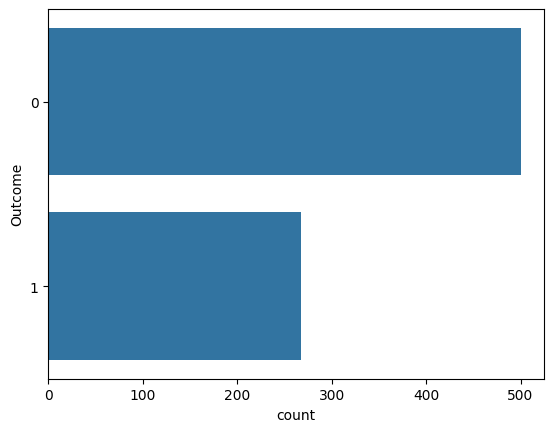

In [20]:
sns.countplot(data=dbt, y="Outcome")

Text(0.5, 0.98, 'Histograms of Pima Indian Diabetes DataSet Feature')

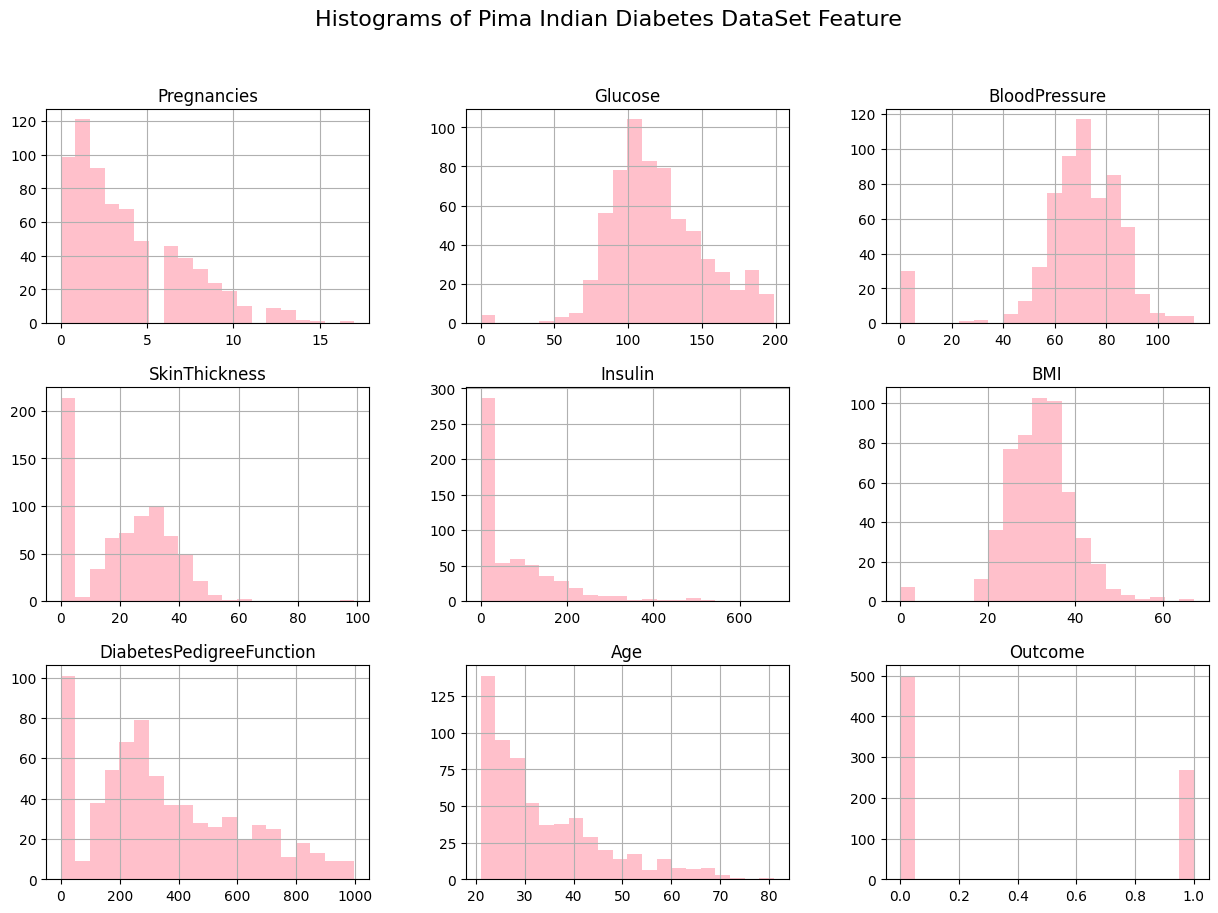

In [21]:
dbt.hist(bins=20, figsize=(15, 10), layout=(3,3),
            color="pink");
plt.suptitle("Histograms of Pima Indian Diabetes DataSet Feature",
             fontsize=16)

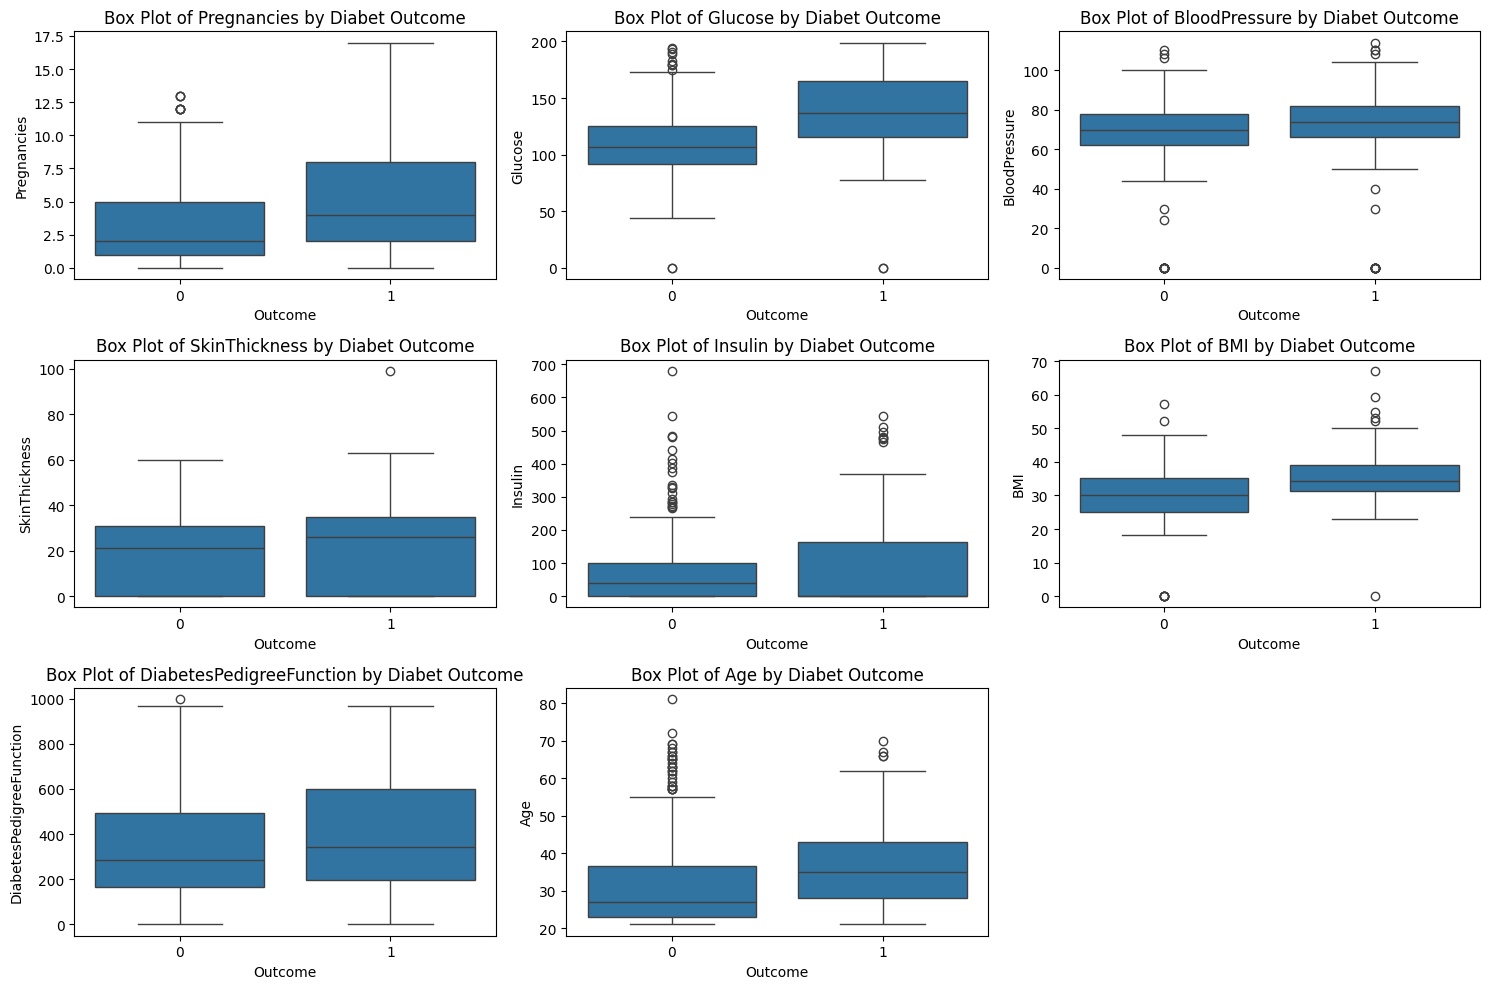

In [22]:
def plot_boxplots(data):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(data.columns[:-1]):
        plt.subplot(3, 3, i+1)
        sns.boxplot(x="Outcome", y=column, data=diabet)
        plt.title(f"Box Plot of {column} by Diabet Outcome")
    plt.tight_layout()
    plt.show()

plot_boxplots(dbt)

<Axes: >

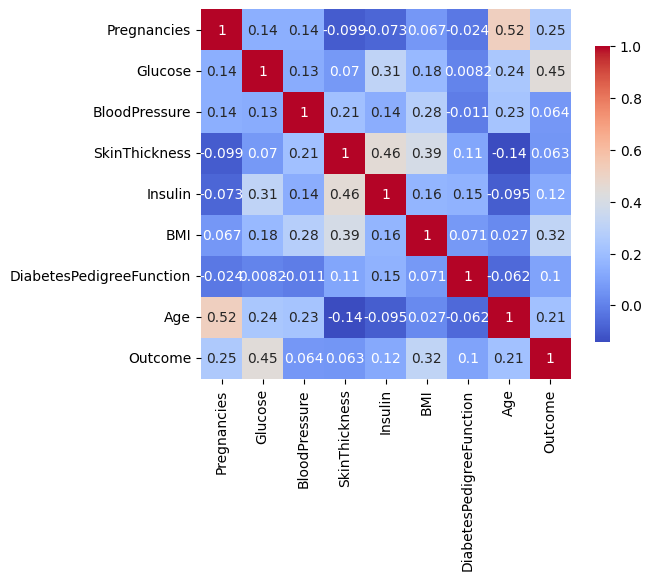

In [23]:
sns.heatmap(dbt.corr(), annot=True, cmap="coolwarm",
            square=True, cbar_kws={"shrink": .8})

In [27]:
food = pd.read_csv("foodreviews.csv")
food.head(3)

,ProductID,Helpfulness_Score,Rating,Review_Title,Text
0,CFB001E4K,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,CFB00813G,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,CFB000LQO,1,4,"""Delight"" says it all",This is a confection that has been around a fe...


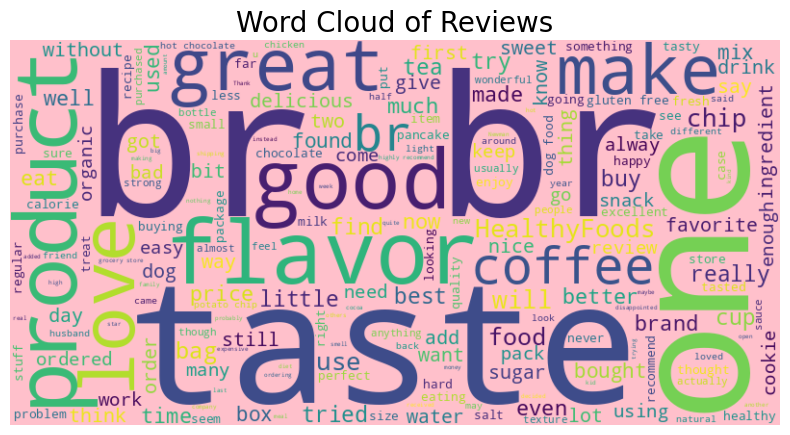

In [29]:
text = " ".join(review for review in food.Text)

def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='pink', colormap='viridis').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Reviews', fontsize = 20)

plot_wordcloud(text)

In [30]:
imputer = KNNImputer(n_neighbors=5)
diabet = pd.DataFrame(imputer.fit_transform(dbt), columns=dbt.columns)

In [31]:
diabet.isnull(). sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [32]:
x = dbt.drop("Outcome", axis=1)
y = dbt["Outcome"]

<Axes: xlabel='count', ylabel='Outcome'>

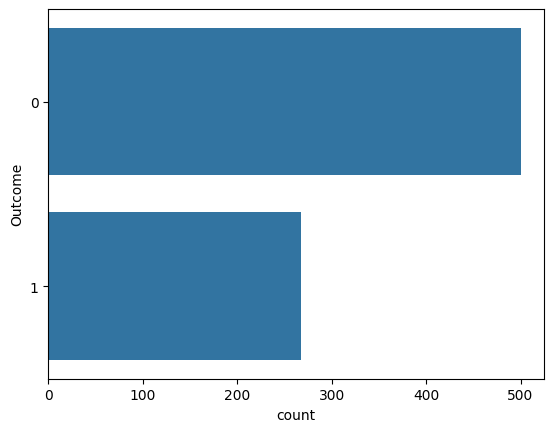

In [35]:
sns.countplot(data=dbt, y=y)

In [39]:
dbt.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.0,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.0,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.0,32.0,1
